最終比較グラフを 'final_comparison_plot.png' として保存しました。


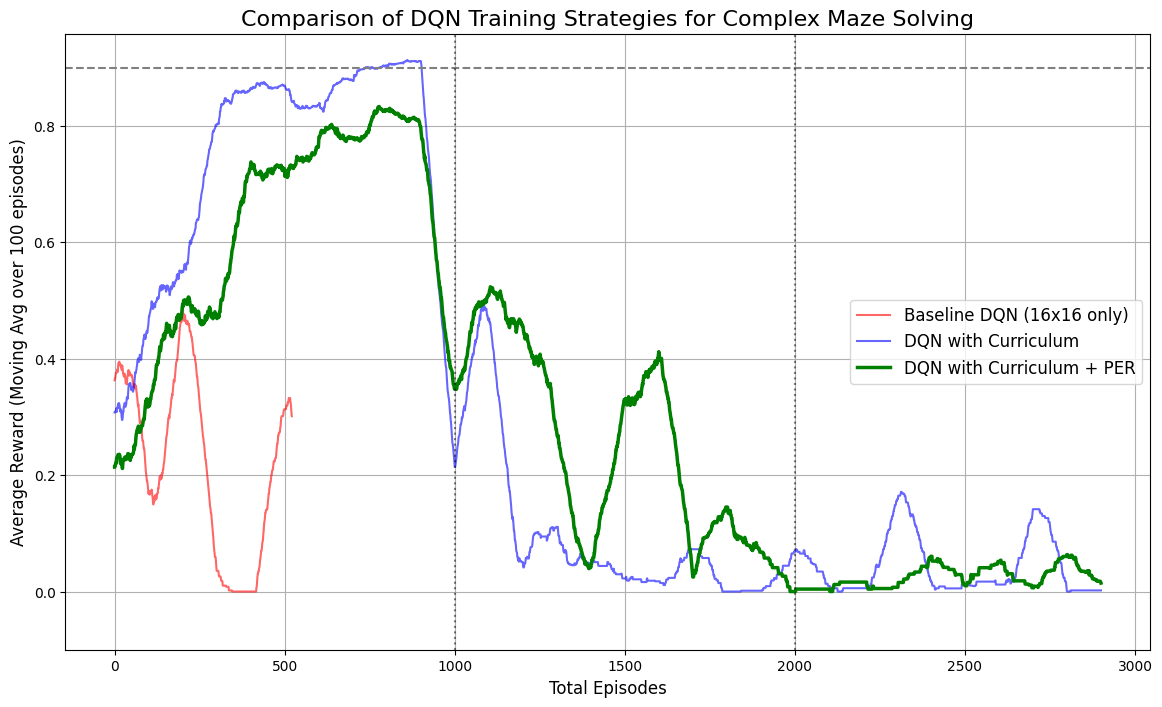

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# --- データをロード ---
try:
    # 各実験で保存した.npyファイルをロード
    baseline_rewards = np.load("baseline_rewards_40min.npy")
    curriculum_rewards = np.load("curriculum_rewards.npy")
    per_rewards = np.load("per_rewards.npy")
except FileNotFoundError as e:
    print(f"エラー: 結果ファイルが見つかりません。({e.filename})")
    print("ベースライン、カリキュ-ラム学習（PERなし）、PERありの3つ全ての.npyファイルが揃っているか確認してください。")
    exit()

# --- 移動平均を計算 ---
window_size = 100
baseline_moving_avg = np.convolve(baseline_rewards, np.ones(window_size)/window_size, mode='valid')
curriculum_moving_avg = np.convolve(curriculum_rewards, np.ones(window_size)/window_size, mode='valid')
per_moving_avg = np.convolve(per_rewards, np.ones(window_size)/window_size, mode='valid')

# --- グラフの描画 ---
plt.figure(figsize=(14, 8))

# 各実験結果をプロット
plt.plot(baseline_moving_avg, label='Baseline DQN (16x16 only)', color='red', alpha=0.6)
plt.plot(curriculum_moving_avg, label='DQN with Curriculum', color='blue', alpha=0.6)
plt.plot(per_moving_avg, label='DQN with Curriculum + PER', color='green', linewidth=2.5)

# グラフの体裁を整える
plt.title("Comparison of DQN Training Strategies for Complex Maze Solving", fontsize=16)
plt.xlabel("Total Episodes", fontsize=12)
plt.ylabel("Average Reward (Moving Avg over 100 episodes)", fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.axhline(y=0.9, color='gray', linestyle='--', label='Goal Threshold (Approx.)') # ゴールの目安線
plt.ylim(bottom=-0.1) # Y軸の下限を設定

# カリキュ-ラムの境界線を描画
plt.axvline(x=1000, color='black', linestyle=':', alpha=0.5)
plt.axvline(x=2000, color='black', linestyle=':', alpha=0.5)

plt.savefig("final_comparison_plot.png")
print("最終比較グラフを 'final_comparison_plot.png' として保存しました。")
plt.show()